In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
import sklearn as sk
import pandas as pd
from sklearn.datasets import load_breast_cancer

breastcancer_DB = sk.datasets.load_breast_cancer()
X, y = breastcancer_DB.data, breastcancer_DB.target
print(breastcancer_DB.keys())
print(breastcancer_DB['feature_names'])
table_BC = pd.DataFrame(X, columns=breastcancer_DB['feature_names'])
table_BC['target']= y
table_BC['target'].value_counts()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


target
1    357
0    212
Name: count, dtype: int64

<Axes: >

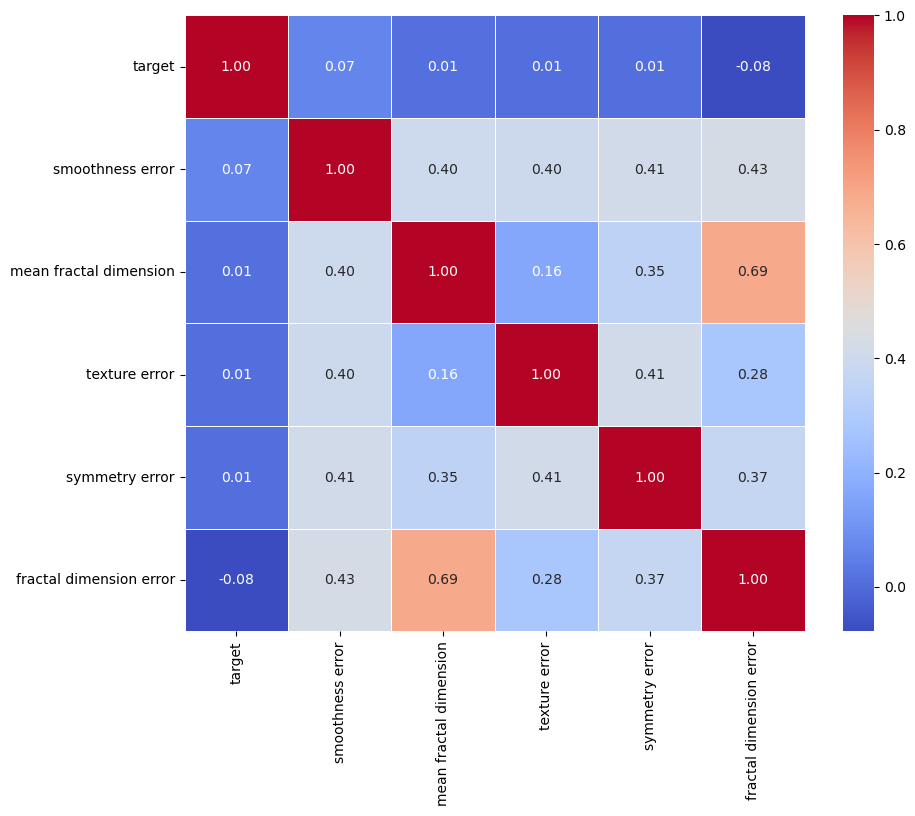

In [12]:
correlation_matrix = table_BC.corr().sort_values(by = 'target',ascending = False)[0:6]
correlation_matrix = correlation_matrix[correlation_matrix.index]

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

In [14]:
X = table_BC.drop('target',axis=1)
y = table_BC['target']
X_norm = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=4)

In [21]:
k = 3
#Train Model and Predict  
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_model = knn_classifier.fit(X_train,y_train)
yhat = knn_model.predict(X_test)
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

Test set Accuracy:  0.9824561403508771


## We can choose the K value with an automated grid search method.

In [20]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':[1, 3, 6, 10, 15]}
knn_classifier_open = KNeighborsClassifier()
clf = GridSearchCV(knn_classifier_open, parameters)
clf.fit(X_train,y_train)
yhat = clf.predict(X_test)
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

Test set Accuracy:  0.956140350877193


In [22]:
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_n_neighbors',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

## We can also visualize the result varing in function of K-value to choose manually.

In [26]:
Ks = 100
acc = np.zeros((Ks))
std_acc = np.zeros((Ks))
for n in range(1,Ks+1):
    #Train Model and Predict  
    knn_model_n = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = knn_model_n.predict(X_test)
    acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

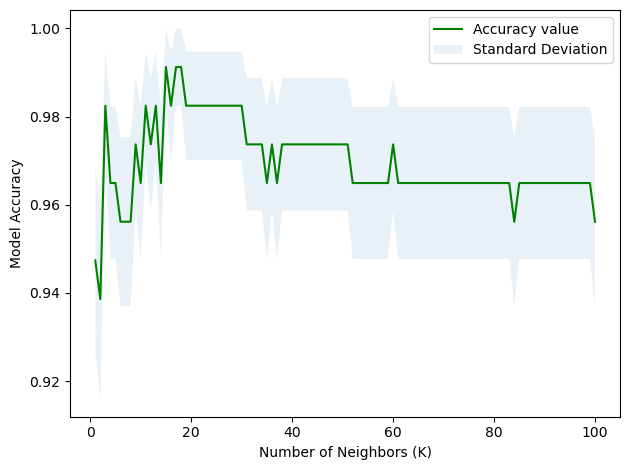

In [28]:
plt.plot(range(1,Ks+1),acc,'g')
plt.fill_between(range(1,Ks+1),acc - 1 * std_acc,acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [29]:
print( "The best accuracy was with", acc.max(), "with k =", acc.argmax()+1) 

The best accuracy was with 0.9912280701754386 with k = 15
